In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from google.colab import files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving fashion-mnist_test.csv to fashion-mnist_test.csv
Saving fashion-mnist_train.csv to fashion-mnist_train.csv


In [ ]:
# Load the train data
df_train = pd.read_csv("fashion-mnist_train.csv")

# Load the test data
df_test = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
# Preprocess the data
X_train = df_train.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
X_test = df_test.drop('label', axis=1).values.reshape(-1, 28, 28, 1) / 255.0
y_train = to_categorical(df_train['label'].values)
y_test = to_categorical(df_test['label'].values)

In [ ]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:

# Train the model
history = model.fit(X_test, y_test, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)


Epoch 1/10
79/79 [==============================] - 11s 118ms/step - loss: 1.1934 - accuracy: 0.5840 - val_loss: 0.6453 - val_accuracy: 0.7591
Epoch 2/10
79/79 [==============================] - 10s 130ms/step - loss: 0.6895 - accuracy: 0.7485 - val_loss: 0.5200 - val_accuracy: 0.8034
Epoch 3/10
79/79 [==============================] - 9s 116ms/step - loss: 0.5962 - accuracy: 0.7835 - val_loss: 0.4734 - val_accuracy: 0.8159
Epoch 4/10
79/79 [==============================] - 9s 109ms/step - loss: 0.5320 - accuracy: 0.8034 - val_loss: 0.4327 - val_accuracy: 0.8382
Epoch 5/10
79/79 [==============================] - 10s 130ms/step - loss: 0.4867 - accuracy: 0.8256 - val_loss: 0.3909 - val_accuracy: 0.8548
Epoch 6/10
79/79 [==============================] - 9s 116ms/step - loss: 0.4709 - accuracy: 0.8274 - val_loss: 0.3707 - val_accuracy: 0.8631
Epoch 7/10
79/79 [==============================] - 9s 112ms/step - loss: 0.4321 - accuracy: 0.8459 - val_loss: 0.3419 - val_accuracy: 0.8745
Epo

In [ ]:
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

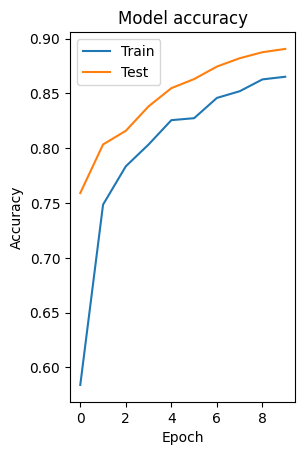

In [ ]:
# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

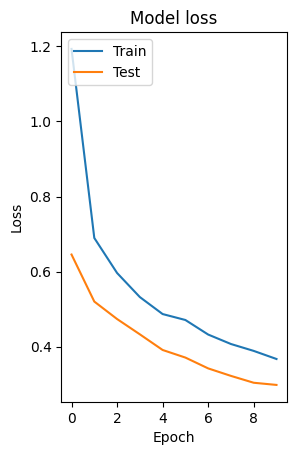

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')


In [ ]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>